<a href="https://colab.research.google.com/github/joaofgdev/Introducao-dataScience/blob/main/aula%202%20-%20An%C3%A1lise%20Explorat%C3%B3ria%20e%20Visualiza%C3%A7%C3%A3o%20de%20Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd


In [9]:
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [10]:
notas.shape # ver qual é o formato das notas


(100836, 4)

In [12]:
notas.columns = ['UsuarioID', 'FilmeID', 'Nota', 'Momento'] # muda o nome das colunas
notas.head() # me mostra o cabeçalho da lista (os 5 primeiros dados)

,UsuarioID,FilmeID,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [14]:
notas["Nota"] # mostra a coluna desejada

,Nota
0,4.0
1,4.0
2,4.0
3,5.0
4,5.0
...,...
100831,4.0
100832,5.0
100833,5.0
100834,5.0


In [15]:
notas["Nota"].unique() # mostra os valores unicos

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [16]:
notas["Nota"].value_counts() # mostra a quantidade de notas

,count
Nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [19]:
notas["Nota"].mean() # calcula a media

np.float64(3.501556983616962)

<Axes: >

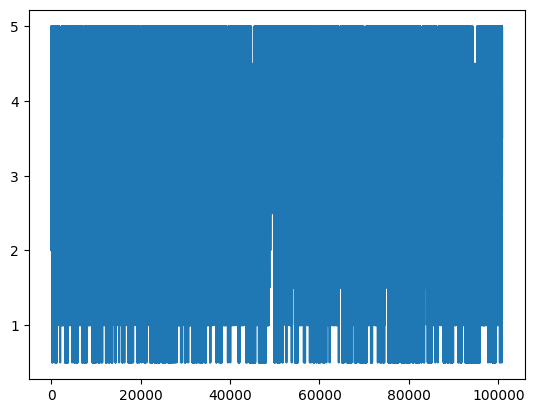

In [20]:
notas["Nota"].plot() # me da um grafido das notas

<Axes: ylabel='Frequency'>

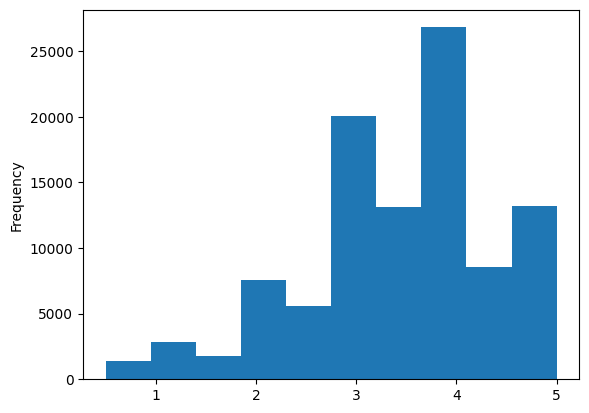

In [21]:
notas["Nota"].plot(kind="hist") # me da um histograma das notas

Conseguesse perceber que a maioria das pessoas dao nota > de 3

In [23]:
notas["Nota"].median() # mostra a mediana da tabela

3.5

In [24]:
mediana = notas["Nota"].median()
media = notas["Nota"].mean()
print(f"Mediana é {mediana}, e a media é {media} ")

Mediana é 3.5, e a media é 3.501556983616962 


In [28]:
notas["Nota"].describe() # descreve a tabela

,Nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


<Axes: ylabel='Nota'>

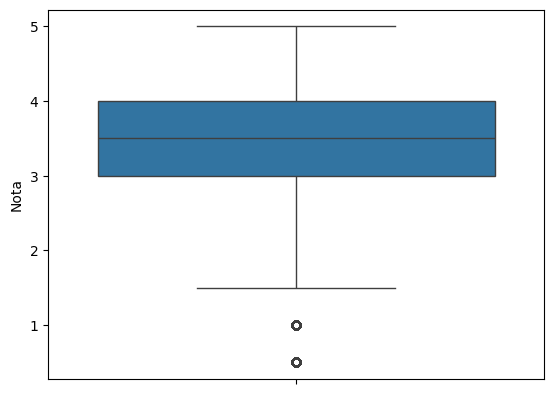

In [30]:
import seaborn as sns

sns.boxplot(notas["Nota"]) # mostra um boxplot

mostra as medianas dos dados coletados

In [32]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv')
filmes.columns = ["filmeId", "Titulo", "Generos"]
filmes.head()

,filmeId,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [41]:

notas.query("FilmeID == 1")['Nota'].mean() # mostra a media das notas do filme 1

np.float64(3.9209302325581397)

In [42]:
notas.query("FilmeID == 2")['Nota'].mean() # mostra a media das notas do filme 2

np.float64(3.4318181818181817)

In [46]:
mediasPorFIlme = notas.groupby("FilmeID")["Nota"].mean()
mediasPorFIlme.head()

,Nota
FilmeID,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

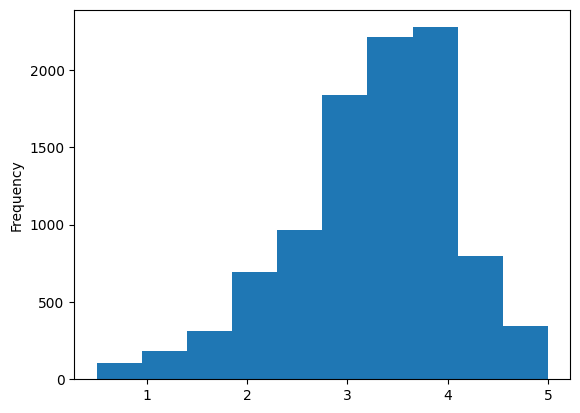

In [47]:
mediasPorFIlme.plot(kind="hist")

<Axes: ylabel='Nota'>

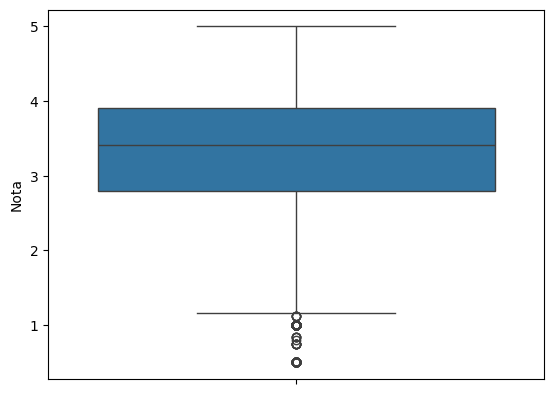

In [48]:
sns.boxplot(mediasPorFIlme)

In [49]:
mediasPorFIlme.describe()

,Nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


Text(0.5, 1.0, 'Histograma das medias dos filmes')

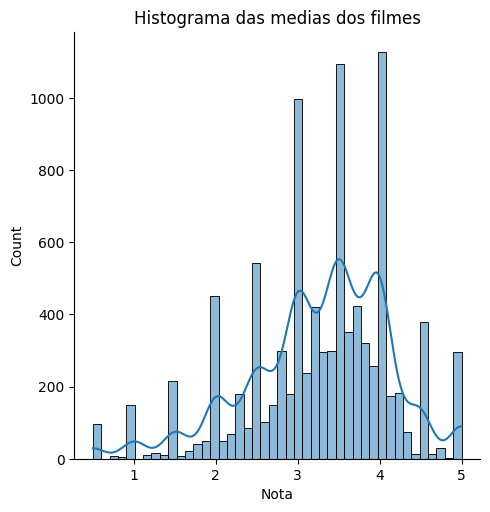

In [53]:
import matplotlib.pyplot as plt

sns.displot(mediasPorFIlme, kde=True)  # mostra o grafico de barras mais completo com uma curva que acomplanha a evoluçao dos dados
plt.title("Histograma das medias dos filmes") # altera os titulos dos graficos

grafico com o seaborn e com o acompanhamento pela curva